<a href="https://colab.research.google.com/github/JuanJimenezGuerra/momentos_evaluativos/blob/main/ME03_G03_%5B1020455642%5D_%5B1057465521%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterización de clientes en el sector de créditos hipotecarios

El objetivo de este notebook es dejar preparados los datos pensando en posteriormente,  evidenciar una agrupación en clústeres bajo una técnica de aprendizaje automático no supervisada como lo es k -means que se utiliza para identificar grupos de objetos de datos en un conjunto de datos.

In [45]:
# Importamos las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
!pip install unidecode
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

##Cargar dataset:

Los datos a tratar provienen de fases iniciales del ciclo de vida de los clientes en la empresa, es decir, la información proviene del historial de clientes que han ingresado a la compañía. La base de datos contiene información detallada sobre los clientes, incluyendo campos como edad, ciudad de residencia, score de crédito, ocupación, entre otros.

In [3]:
archivo = 'https://raw.githubusercontent.com/JuanJimenezGuerra/momentos_evaluativos/main/momentos_evaluativos/ME03/Datos_Grupo03.csv'
df= pd.read_csv(archivo, sep= ",", low_memory=False)
df

,Id,Website,Candidato Owner Name,Candidato Source,Candidato Status,Created Time,Is Converted?,Tasks Involved,Events Involved,Calls Involved,...,Tiempo de conversión de leads en días,Conversión ok?,Respuesta consulta centrales,Pago mínimo TC.,Pago mínimo otros créditos.,Cupo total TC.,Ocupación Principal,¿El segundo ingreso a que ocupación corresponde?,¿Cuál es el valor mensual del segundo ingreso?,¿Cuánto es tu gasto familiar promedio por mes?
0,2259602000346836140,NaN,Maria Camila Paez,Bancolombia,Interesado,04/08/2022 09:19 AM,Yes,No,No,No,...,136.0,NaN,Restringido,$ 0.00,$ 0.00,$ 200.00,Transportador,NaN,NaN,NaN
1,2259602000423426347,NaN,Diana Barcenas,facebook,Interesado,08/22/2022 05:49 PM,Yes,No,No,No,...,58.0,NaN,Restringido,$ 0.00,$ 0.00,$ 0.00,Transportador,NaN,NaN,NaN
2,2259602000255775584,NaN,Juan Carlos Vargas,Otros,Interesado,07/08/2021 02:02 PM,Yes,No,No,No,...,483.0,NaN,Restringido,$ 55.00,$ 0.00,$ 600.00,Transportador,Transportador,"$ 3,000.00",$ 150.00
3,2259602000724262417,NaN,Marcela Estrada,Referidos,Interesado,11/03/2023 11:23 AM,Yes,NaN,NaN,NaN,...,97.0,NaN,NaN,NaN,NaN,NaN,Transportador,NaN,NaN,NaN
4,2259602000638036993,NaN,Diana Paola Echeverri,Referidos,Interesado,07/19/2023 04:05 PM,Yes,NaN,NaN,NaN,...,0.0,Conversión OK,Restringido,$ 0.00,$ 0.00,$ 0.00,Transportador,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,2259602000397759445,NaN,Asesor de Pruebas Viventa,NaN,Interesado,07/11/2022 03:57 PM,Yes,No,No,No,...,0.0,Conversión OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28298,2259602000823239455,NaN,Diana Patiño,NaN,Contactado con éxito,03/01/2024 07:10 PM,Yes,NaN,NaN,NaN,...,0.0,Conversión OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28299,2259602000529996072,NaN,Jessica Parra,Referidos,Interesado,02/16/2023 11:17 AM,Yes,NaN,NaN,NaN,...,0.0,Conversión OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28300,2259602000667164184,NaN,Luisa Silva,Referidos,Interesado,08/23/2023 05:11 PM,Yes,NaN,NaN,NaN,...,0.0,Conversión OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Revisamos información preliminar del dataset cargado, como cantidad de columnas y número de filas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Columns: 186 entries, Id to ¿Cuánto es tu gasto familiar promedio por mes?
dtypes: float64(29), int64(4), object(153)
memory usage: 40.2+ MB


In [5]:
#Revisamos cantidad de datos nulos:
df.isnull().sum()

Id                                                      0
Website                                             28302
Candidato Owner Name                                    0
Candidato Source                                      457
Candidato Status                                        6
                                                    ...  
Cupo total TC.                                      16666
Ocupación Principal                                 12781
¿El segundo ingreso a que ocupación corresponde?    27267
¿Cuál es el valor mensual del segundo ingreso?      27276
¿Cuánto es tu gasto familiar promedio por mes?      19224
Length: 186, dtype: int64

In [6]:
#Eliminamos columnas con más del 50% de registros nulos:
columnas_con_nulos = df.columns[df.isnull().sum() > df.shape[0]/2]
df = df.drop(columnas_con_nulos, axis=1)

#Revisamos el nuevo dataset sin columnas con más del 50% de registros nulos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Id                                         28302 non-null  int64  
 1   Candidato Owner Name                       28302 non-null  object 
 2   Candidato Source                           27845 non-null  object 
 3   Candidato Status                           28296 non-null  object 
 4   Created Time                               28302 non-null  object 
 5   Is Converted?                              28302 non-null  object 
 6   Tasks Involved                             20832 non-null  object 
 7   Events Involved                            20832 non-null  object 
 8   Calls Involved                             20832 non-null  object 
 9   Activities Involved                        28302 non-null  int64  
 10  Modified Time         

In [7]:
df.head(2)

,Id,Candidato Owner Name,Candidato Source,Candidato Status,Created Time,Is Converted?,Tasks Involved,Events Involved,Calls Involved,Activities Involved,...,Fecha nacimiento,Last Activity Time,Candidato Conversion Time,Necesita Credito,Sexo,Vive en Colombia,Ya tiene propiedad,Tiempo de conversión de leads en días,Respuesta consulta centrales,Ocupación Principal
0,2259602000346836140,Maria Camila Paez,Bancolombia,Interesado,04/08/2022 09:19 AM,Yes,No,No,No,0,...,04/15/1985,08/22/2022 05:07 PM,136,Yes,M,No,No,136.0,Restringido,Transportador
1,2259602000423426347,Diana Barcenas,facebook,Interesado,08/22/2022 05:49 PM,Yes,No,No,No,0,...,07/16/1978,10/19/2022 11:06 AM,58,No,NaN,No,No,58.0,Restringido,Transportador


In [8]:
#Eliminamos columnas que contengas nombres o ID's:
df.drop(['Id','Candidato Owner Name','Converted Deal','Converted Account','Converted Contact','Created By'], axis='columns', inplace=True)

#Eliminamos columnas que contienen en todos los registros un unico valor:
df.drop(['Is Converted?','Nombre del Aliado'], axis='columns', inplace=True)

#Eliminamos columnas que contienen fechas porque no le aportaran al modelo de clustering:
df.drop(['Created Time','Modified Time', 'Ultima actividad', 'Detalle actividades', 'Fecha Informe Bancolombia', 'Converted Time',
        'Fecha cambio de estado','Fecha nacimiento','Last Activity Time'], axis='columns', inplace=True)

#Revisamos valores unicos por columna:
df.apply(pd.unique)

Candidato Source                             [Bancolombia, facebook, Otros, Referidos, Davi...
Candidato Status                             [Interesado, Revisar en el futuro, En Prospecc...
Tasks Involved                                                                  [No, nan, Yes]
Events Involved                                                                 [No, nan, Yes]
Calls Involved                                                                  [No, nan, Yes]
Activities Involved                                                                     [0, 1]
¿En que ciudad quiere comprar?               [Armenia, Cali, Medellín, Otra, No Definida, C...
Tipo de documento                            [CEDULA DE CIUDADANIA, nan, CÉDULA EXTRANJERIA...
¿Por que medio se entero de nosotros?        [Remesas, facebookads, Sin identificar, Client...
País de residencia                           [USA, España, Francia, Chile, Ecuador, Canada,...
Mi casa con giros                                 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Candidato Source                           27845 non-null  object 
 1   Candidato Status                           28296 non-null  object 
 2   Tasks Involved                             20832 non-null  object 
 3   Events Involved                            20832 non-null  object 
 4   Calls Involved                             20832 non-null  object 
 5   Activities Involved                        28302 non-null  int64  
 6   ¿En que ciudad quiere comprar?             27540 non-null  object 
 7   Tipo de documento                          24742 non-null  object 
 8   ¿Por que medio se entero de nosotros?      26149 non-null  object 
 9   País de residencia                         27076 non-null  object 
 10  Mi casa con giros     

###Limpieza de columnas categóricas:

En esta sección del código, se llevó a cabo un proceso de limpieza y estandarización de las variables categóricas, se agruparon estas variables en conjuntos homogéneos, para facilitar su procesamiento y entendimiento.

In [10]:
#Corregir y estandarizar la columna 'Candidato Source':
candidato_map = {'Referidos':'Referidos',
                 'Referido':'Referidos',
                 'Referido en accion':'Referidos',
                 'facebook':'Redes_Sociales',
                 'Instagram':'Redes_Sociales',
                 'TikTok':'Redes_Sociales',
                 'Bancolombia':'Bancos',
                 'Davivienda':'Bancos',
                 'Banco de Occidente':'Bancos',
                 'google':'Internet',
                 'Ejecutivo de Cuenta':'Ejecutivo de Cuenta',
                 'Eventos':'Eventos',
                 'Evento':'Eventos',
                 'Internet':'Internet',
                 'internet':'Internet',
                 'Otros':'Otros',
                 'Mi Casa con Giros':'Otros',
                 'Medios tradicionales':'Otros',
                 'Visito Oficina - Walk-In':'Otros',
                 'Gestion Propia':'Otros',
                 'WebSite Visit':'Otros',
                 'WhatsApp - Viventa LLC':'Otros',
                 'Candidatos':'Otros',
                 'UA - No definido':'Otros',
                 'Chat':'Otros',
                 'Facebook Ads':'Otros',
                 'Prensa - Medios Impresos':'Otros',
                 'Candidato Source':'Otros',
                 'WhatsApp Business':'Otros',
                 'Plataforma':'Otros',
                 'Zoho Bookings':'Otros',
                 'Marketingautomation':'Otros',
                 'Google AdWords':'Otros',
                 'Campaña agencia Leads':'Otros',
                 'vinculos':'Otros',
                 'No definida':'Otros',
                 'Melendez':'Otros',
                 'RCN nuestra Tele' :'Otros',
                 }
df['Candidato Source'] = df['Candidato Source'].map(candidato_map)

In [11]:
#Corregir y estandarizar la columna 'Candidato Status':
candidato_status_map = {'Interesado':'Interesado',
                      'En Pre-calificación':'Pre_Calificado',
                      'Pre Qualified':'Pre_Calificado',
                      'En Prospección': 'En_Prospeccion',
                      'Revisar en el futuro': 'Otro',
                      'Nuevo': 'Otro',
                      'Cliente perdido': 'Otro',
                      'Contactado con éxito': 'Otro',
                      'Descartado': 'Otro',
                      'Enviado a constructora': 'Otro',
                      'Duplicado': 'Otro',
                      'Reactivado': 'Otro',
                      'Nunca respondió': 'Otro'}
df['Candidato Status'] = df['Candidato Status'].map(candidato_status_map)

In [12]:
#Corregir y estandarizar la columna '¿En que ciudad quiere comprar?':

#Quitar tildes y espacios a la columna "¿En que ciudad quiere comprar?", además colocar el texto en minúscula:
from unidecode import unidecode
def quitar_tildes(texto):
  try:
    return unidecode(texto.lower().replace(" ", ""))
  except:
    return texto

df['¿En que ciudad quiere comprar?'] = df['¿En que ciudad quiere comprar?'].apply(quitar_tildes)
df['¿En que ciudad quiere comprar?'].value_counts().sort_values(ascending=False).head(50)


#Dejar solo ciudades con más frecuencia de datos
ciudades = ['cali', 'medellin','bogota','pereira','armenia','barranquilla', 'cartagena', 'manizales',
            'palmira', 'bucaramanga']
def otras_ciudades(ciudad):
  if (ciudad == "nodefinida" or ciudad == "otra" or ciudad not in ciudades):
    return "Otra"
  else:
    return ciudad
df['¿En que ciudad quiere comprar?'] = df['¿En que ciudad quiere comprar?'].apply(otras_ciudades)
df['¿En que ciudad quiere comprar?'].value_counts().sort_values(ascending=False)

¿En que ciudad quiere comprar?
Otra            7719
cali            5159
medellin        4615
bogota          3318
pereira         2076
armenia         1443
barranquilla    1344
cartagena        904
manizales        650
palmira          565
bucaramanga      509
Name: count, dtype: int64

In [13]:
#Corregir y estandarizar la columna 'Tipo de documento':
documento_map = {'CEDULA DE CIUDADANIA':'Cedula_Ciudadania',
                 'PASAPORTE':'Pasaporte',
                 'CÉDULA EXTRANJERIA ':'Cedula_Extranjeria',
                 'CÉDULA DE EXTRANJERIA':'Cedula_Extranjeria',
                 'Cedula de Extranjeria': 'Cedula_Extranjeria',
                 '*': 'Cedula_Ciudadania',
                 'CC': 'Cedula_Ciudadania',
                 'cedula': 'Cedula_Ciudadania'}
df['Tipo de documento'] = df['Tipo de documento'].map(documento_map)

In [14]:
#Corregir y estandarizar la columna '¿Por que medio se entero de nosotros?':

#Quitar tildes y espacios a la columna "¿Por que medio se entero de nosotros?", además colocar el texto en minúscula:
df['¿Por que medio se entero de nosotros?'] = df['¿Por que medio se entero de nosotros?'].apply(quitar_tildes)
df['¿Por que medio se entero de nosotros?'].value_counts().sort_values(ascending=False).head(60)

¿Por que medio se entero de nosotros?
clientes                         4593
facebookads                      4444
sinidentificar                   2404
redsucursal                      2119
constructora                     1612
autoreferidoportalweb            1469
organic                          1271
referidosdavivienda               948
bancolombia                       801
gestionpropia                     607
cliente                           556
facebook                          544
ejecutivodecuenta                 498
davivienda                        470
buscador                          388
otroseventos                      327
googleads                         327
chatpaginaweb                     256
eventolocal                       241
instagram                         212
camacol                           211
feriadavivienda                   194
referidosenaccion                 145
paginaweb                         130
otro                              129
referidoenac

In [15]:
medios = {
 'afichesyvolantes': 'marketing',
 'autoreferidoportalweb': 'paginaweb',
 'bancolombia': 'banco',
 'buscador': 'marketing',
 'camacol': 'otro',
 'camacolnyoct2018': 'evento',
 'chatpaginaweb': 'paginaweb',
 'cliente': 'cliente',
 'clientes': 'cliente',
 'colombianosune': 'evento',
 'colombianosunemiami2017': 'evento',
 'constructora': 'referido',
 'constructoraofiduciaria': 'referido',
 'consulado': 'otro',
 'davivienda': 'banco',
 'doverdiscount': 'otro',
 'ejecutivodecuenta': 'otro',
 'elrinconcitomay-2018': 'evento',
 'eventolocal': 'evento',
 'facebook': 'redes_sociales',
 'facebookads': 'marketing',
 'feriadavivienda': 'evento',
 'festivaldeindependenciany': 'evento',
 'festivaldeindependianewjersey': 'evento',
 'gestionpropia': 'cliente',
 'gestionpropiaec': 'cliente',
 'googleads': 'marketing',
 'habitat': 'referido',
 'instagram': 'redes_sociales',
 'intranet': 'paginaweb',
 'konecta': 'evento',
 'micasacongiros': 'referido',
 'openhouseatlantamay5-6': 'evento',
 'openhousechicago': 'evento',
 'openhousenutripan': 'evento',
 'organic': 'cliente',
 'otro': 'otro',
 'otroseventos': 'evento',
 'otrosmediostradicionales': 'marketing',
 'otrosreferidos': 'referido',
 'paginaweb': 'paginaweb',
 'paginaweb-contact': 'paginaweb',
 'paginaweb-footer': 'paginaweb',
 'paginaweb-proyecto': 'paginaweb',
 'paginaweb-viveahorro': 'paginaweb',
 'paginaweb-vivecasa': 'paginaweb',
 'paginaweb-viveprestamo': 'paginaweb',
 'plataforma': 'paginaweb',
 'redsucursal': 'referido',
 'referidoenaccion': 'referido',
 'referidosdavivienda': 'referido',
 'referidosenaccion': 'referido',
 'registrowebinar': 'evento',
 'remesas': 'otro',
 'santiagocano': 'referido',
 'sinidentificar': 'otro',
 'tiktok': 'redes_sociales',
 'visitooficina': 'referido',
 'viveahorro': 'referido',
 'youtube': 'redes_sociales'
 }

df['¿Por que medio se entero de nosotros?'] = df['¿Por que medio se entero de nosotros?'].map(medios)
df['¿Por que medio se entero de nosotros?'].value_counts().sort_values(ascending=False)

¿Por que medio se entero de nosotros?
cliente           7090
marketing         5342
referido          5226
otro              3345
paginaweb         2062
banco             1271
evento             993
redes_sociales     782
Name: count, dtype: int64

In [16]:
##Corregir y estandarizar la columna 'País de residencia':
df['País de residencia'].unique()

#Quitar tildes y espacios a la columna "¿Por que medio se entero de nosotros?", además colocar el texto en minúscula:
df['País de residencia'] = df['País de residencia'].apply(quitar_tildes)
df['País de residencia'].value_counts().sort_values(ascending=False).head(60)
df['País de residencia'].value_counts()

País de residencia
usa              16010
espana            4067
chile             2607
canada            1779
reinounido         508
                 ...  
albertat1a3x9        1
spanje               1
deutschland          1
bahamas              1
honduras             1
Name: count, Length: 69, dtype: int64

In [17]:
pais_map2 = {
 'honduras': 'otros',
 'finlandia': 'otros',
 'gibraltar': 'otros',
 'calama': 'otros',
 'camacol': 'otros',
 'bahamas': 'otros',
 'caribeneerlandes': 'otros',
 'paraguay': 'otros',
 'holanda': 'otros',
 'venezuela': 'otros',
 'bolivia': 'otros',
 'japon': 'otros',
 'inglaterra': 'otros',
 'luxemburgo': 'otros',
 'uruguay': 'otros',
 'afganistan': 'otros',
 'puertorico': 'otros',
 'andorra': 'otros',
 'republicadominicana': 'otros',
 'dinamarca': 'otros',
 'polonia': 'otros',
 'irlanda': 'otros',
 'nuevazelanda': 'otros',
 'guatemala': 'otros',
 'noruega': 'otros',
 'portugal': 'otros',
 'austria': 'otros',
 'china': 'otros',
 'curazao': 'otros',
 'emiratosarabesunidos': 'otros',
 'malta': 'otros',
 'israel': 'otros',
 'costarica': 'otros',
 'brasil': 'otros',
 'belgica': 'otros',
 'argentina': 'otros',
 'peru': 'otros',
 'ecuador': 'otros',
 'suecia': 'otros',
 'aruba': 'otros',
 'colombia': 'otros',
 'otros': 'otros',
 'mexico': 'otros',
 'paisesbajos': 'otros',
 'panama': 'otros',
 'suiza': 'otros',
 'alemania': 'otros',
 'australia': 'otros',
 'francia': 'otros',
 'italia': 'otros',
 'reinounido': 'otros',
 'usa': 'usa',
 'espana': 'espana',
 'chile': 'chile',
 'canada': 'canada',

 }

df['País de residencia'] = df['País de residencia'].map(pais_map2)
df['País de residencia'].value_counts().sort_values(ascending=False)

País de residencia
usa       16010
espana     4067
chile      2607
otros      2468
canada     1779
Name: count, dtype: int64

In [18]:
#Corregir y estandarizar la columna 'Estado de Gestión':
estado_gestion_map = {'INTERESADO':'Interesado',
                      'B. INTERESADO':'Interesado',
                      'B. NO INTERESADO':'No_Interesado',
                      'NO INTERESADO': 'No_Interesado',
                      'SE ENVIA INFORMACIÓN POR CORREO': 'Interesado',
                      'RECHAZADO POR VIVENTA': 'Otros',
                      'B. RECHAZADO (VIVENTA)': 'Otros',
                      'B. RECHAZADO VIVENTA': 'Otros',
                      'A. IMPOSIBLE CONTACTAR': 'Otros',
                      'SIN GESTIÓN': 'Otros',
                      'IMPOSIBLE CONTACTAR': 'Otros'}
df['Estado de Gestión'] = df['Estado de Gestión'].map(estado_gestion_map)

In [19]:
#Corregir y estandarizar la columna 'Acquisition':

acquisition_map = { 'Creación Manual': 'creacion_manual', 'Formulario FB': 'formulario', 'Importados Bancolombia': 'importados',
                   'Ejecutivo de Cuenta': 'ejecutivo_de_cuenta', 'WebForm2021': 'formulario', 'Importados Davivienda': 'importados',
                    'CM - Llamada': 'CM', 'Chat Bot': 'ChatBot', 'CM - Chat': 'CM', 'CM - WhatsApp Business': 'CM', 'Referidos Constructoras': 'Referidos',
                    'CM - Whatsapp Business': 'CM', 'WhatsApp Business': 'WhatsApp_Business','CM - Presencial': 'CM', 'CM - Redes sociales': 'CM',
                    'FormularioWPVivePrestamo': 'formulario','Formulario WP': 'formulario', 'Formulario Google': 'formulario', 'Chat': 'WhatsApp_Business',
                    'Chatfuel FB': 'WhatsApp_Business', 'CM - WhatsApp Comercial': 'CM', 'WhatsApp Comercial': 'WhatsApp_Business','Referidos': 'Referidos',
                    'FormularioWPVivecasa': 'formulario', 'CM - Whatsapp Comercial': 'CM','Importados UA': 'importados', 'Form Live': 'formulario',
                    'Portal Referidores': 'Referidos','Portal Promotores': 'Referidos', 'Importado base eventos': 'importados', 'Redes sociales': 'otro',
                    'Conversatorio Camacol': 'otro', 'Importados Viventa Live 2021': 'importados', 'Form Instagram': 'formulario',
                    'Form Madrugon Bancolombia': 'formulario', 'Importados Viventa Live 2020': 'importados','Form Influencer Marketing': 'formulario',
                    'Importados Bacolombia': 'importados','FormularioWPProject': 'formulario', 'Form OH Viventa': 'formulario',
                    'Form OH Bancolombia': 'formulario','Camacol': 'otro', 'Form OH Bolivar': 'formulario', 'Whatsapp ChatBot': 'ChatBot',
                    'Importados Black Friday': 'importados', 'Form Madrugon Viventa': 'formulario','ReferidoresForm2021': 'Referidos',
                    'Campaña Bolívar Bogotá': 'otro', 'FormularioWPHome': 'formulario','Formulario Webinar': 'formulario', 'Plataforma': 'otro',
                    'Reactivado correo': 'otro','FormularioWPLiveAbril2019': 'formulario', 'Conversatorio Camacol 07/20.': 'otro',
                    'Conversatorio Bancolombia': 'otro', 'Form TikTok': 'formulario','Form Conversatorio Davivienda': 'formulario',
                    'Comentarios FB': 'otro', 'FormularioWPEuropa': 'formulario', 'Reactivado por correo': 'otro', 'Landing Eventos': 'otro',
                    'Formulario OH Bancolombia': 'formulario', 'Campaña Bolívar Cali': 'otro', 'Formulario OH Viventa': 'formulario',
                    'Conversatorio Davivienda': 'otro', 'Platform': 'otro', 'Facebook': 'otro', 'Form Finca Raiz': 'formulario', 'Chatfuel Web': 'otro',
                    'FormularioWPBienesyBienes': 'formulario', 'Importados Webinar': 'importados', 'WebFormAu': 'otro',
                    'Importados Melendez': 'importados', 'Formulario Nequi': 'formulario', 'Importado Camacol': 'importados'}
df['Acquisition'] = df['Acquisition'].map(acquisition_map)


In [20]:
#Corregir y estandarizar la columna '¿El cliente tiene propiedad seleccionada?':

propiedad_seleccionada_map = {'No':'No',
                              'Si. Necesito sólo financiación':'Si',
                              'Si':'Si',
                              'No. Quiero ver proyectos.': 'No',
                              'Sí. Necesito sólo financiación.': 'Si',
                              'Sí. Necesito sólo financiación': 'Si'}
df['¿El cliente tiene propiedad seleccionada?'] = df['¿El cliente tiene propiedad seleccionada?'].map(propiedad_seleccionada_map)

In [21]:
#Corregir y estandarizar la columna 'Sexo':
sexo_map = {'F':'F',
            'M':'M',
            'H':'M'}
df['Sexo'] = df['Sexo'].map(sexo_map)

In [22]:
#Corregir y estandarizar la columna 'Respuesta consulta centrales':
respuesta_centrales = {'Favorable Plus':'Favorable',
                       'Restringido':'Restringido',
                       '-No Value-':'Sin_Respuesta',
                       'Favorable':'Favorable',
                       'Restringida': 'Restringido',
                       'Sin respuesta': 'Sin_Respuesta'}
df['Respuesta consulta centrales'] = df['Respuesta consulta centrales'].map(respuesta_centrales)

In [23]:
#Corregir y estandarizar la columna 'Ocupación Principal':
ocupacion_map = {'Empleado':'Empleado',
                 'Independiente':'Independiente',
                 'Pensionado':'Pensionado',
                 'Ama de casa ': 'Otro',
                 'Profesional independiente': 'Independiente',
                 'Otra': 'Otro',
                 'Transportador': 'Otro',
                 'Estudiante': 'Otro',
                 'Servidor público': 'Otro',
                 'Rentista de capital': 'Otro',
                 'Socio o Empleado – socio': 'Otro',
                 'Otra Ocupación': 'Otro',
                 'Socio o COO': 'Otro',
                 'Socio o rentista de capital':'Otro',
                 'Pension':'Pensionado',
                 'Ninguno':'Otro',
                 'Salario + comisiones': 'Otro',
                 'En proceso':'Otro',
                 'Retired': 'Otro',
                 'Desempleada': 'Otro',
                 'Dependiente': 'Otro',
                 'AyB': 'Otro',
                 'Asalariado e Independiente': 'Independiente',
                 'Asalariada y independiente': 'Independiente',
                 'Retirado':'Otro' }
df['Ocupación Principal'] = df['Ocupación Principal'].map(ocupacion_map)

In [24]:
#Eliminamos columnas que contengan información ya capturada y valores sin sentido de negocio:
df.drop(['Proyecto','Tasks Involved','Calls Involved','City','Estado'], axis='columns', inplace=True)

### Limpieza de columnas numéricas:

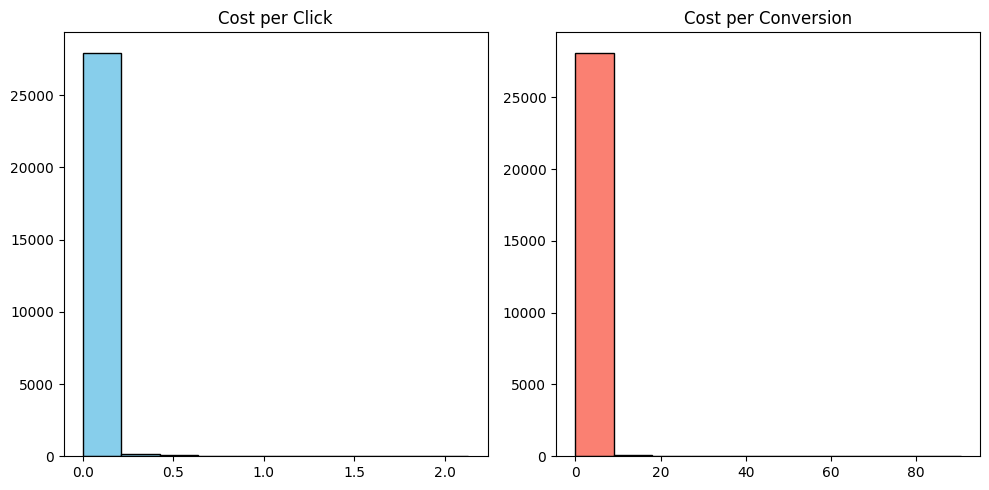

In [25]:
#Transformar columna 'Cost per Conversion' a tipo númerico:
df['Cost per Conversion'] = df['Cost per Conversion'].str.replace("$", "").str.strip()
df['Cost per Conversion'] = df['Cost per Conversion'].astype(np.float64)

#Transformar columna 'Cost per Conversion' a tipo númerico:
df['Cost per Click'] = df['Cost per Click'].str.replace("$", "").str.strip()
df['Cost per Click'] = df['Cost per Click'].astype(np.float64)

#Revisar gráficamente las variables númericas relacionadas con el costo por click:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histograma para Cost per Click
axs[0].hist((df['Cost per Click']), bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Cost per Click')

# Histograma para Cost per Conversion
axs[1].hist((df['Cost per Conversion']), bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Cost per Conversion')

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

Evidenciamos con el histograma que la variable "Cost per Click" y "Cost per Conversion" contienen la misma información, por lo que procedemos a eliminar una de las variables:

In [26]:
#Elimar la viariable 'Cost per Click':
df = df.drop(['Cost per Click'], axis=1)

#Revisar los valores máximos y minimos de la columna 'Cost per Conversion' para validar que se encuentren dentro de los rangos normales para el negocio:
maximo_click = df['Cost per Conversion'].max()
minimo_click = df['Cost per Conversion'].min()
print(f"El valor máximo es {maximo_click} y el valor mínimo es {minimo_click} en la columna 'Cost per Conversion'.")

El valor máximo es 90.45 y el valor mínimo es 0.0 en la columna 'Cost per Conversion'.


In [27]:
#Revisar edades que son consideradas como invalidas para negocio: menores a 18 y mayores a 72 (Edades mimima y máxima definidas por negocio)
print(df[df['Edad'] < 18]['Edad'])
print(df[df['Edad'] > 72]['Edad'])

# Convertir valores menores a 18 y mayores a 72 en NaN
df['Edad'] = df['Edad'].apply(lambda x: np.nan if x < 18 or x > 72 else x)

# Imputar valores faltantes con la media de 'Edad'
df['Edad'].fillna(df['Edad'].mean(), inplace=True)

6        0.0
21       0.0
33       0.0
35       0.0
37       0.0
        ... 
28290    0.0
28292    0.0
28293    0.0
28294    0.0
28295    0.0
Name: Edad, Length: 6844, dtype: float64
134       73.0
491      725.0
6472      73.0
6765     831.0
14652     73.0
17603     75.0
18198     76.0
18226     74.0
18542     74.0
19549     79.0
19908     73.0
20070    148.0
20224     74.0
22015     75.0
22322    388.0
22880     74.0
26539    125.0
26754     75.0
26980     73.0
27627     81.0
Name: Edad, dtype: float64


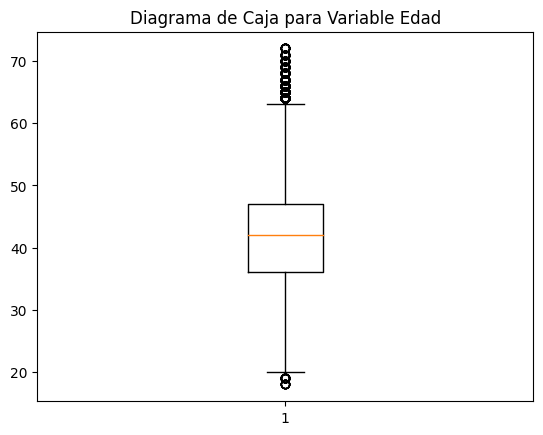

In [28]:
#Realizamos un Boxplot para explorar como nos quedó la variable EDAD, su dispersión y la presencia de valores atípicos tras los ajustes de negocio.
# Crear el box plot
plt.boxplot(df['Edad'])

# Añadir título
plt.title('Diagrama de Caja para Variable Edad')

# Mostrar el box plot
plt.show()

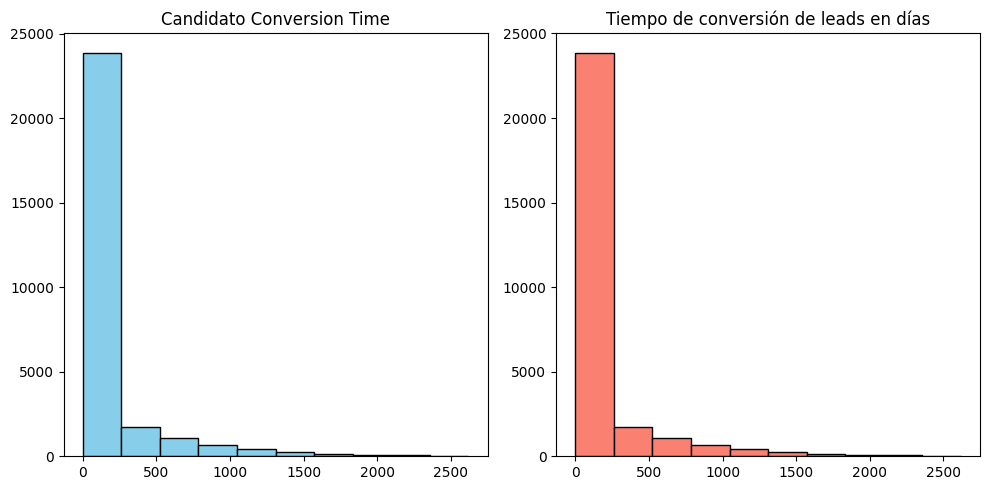

In [29]:
#Revisar gráficamente las variables númericas relacionadas con la conversión de leads:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histograma para la primera variable
axs[0].hist((df['Candidato Conversion Time']), bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Candidato Conversion Time')

# Histograma para la segunda variable
axs[1].hist((df['Tiempo de conversión de leads en días']), bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Tiempo de conversión de leads en días')

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

El análisis del histograma revela que las variables 'Candidato Conversion Time' y 'Tiempo de Conversión de leads en días' muestran la misma información. Por lo tanto, procedemos a eliminar una de las variables:

In [30]:
#Elimar la viariable 'Candidato Conversion Time':
df = df.drop(['Candidato Conversion Time'], axis=1)

#Igual reviamos los valores máximos y minimos de la columna 'Tiempo de conversión de leads en días' para validar que se
#encuentren dentro de los rangos normales para el negocio:

maximo_leads = df['Tiempo de conversión de leads en días'].max()
minimo_leads = df['Tiempo de conversión de leads en días'].min()
print(f"El valor máximo es {maximo_leads} y el valor mínimo es {minimo_leads} en la columna 'Tiempo de conversión de leads en días'.")

El valor máximo es 2618.0 y el valor mínimo es 0.0 en la columna 'Tiempo de conversión de leads en días'.


## Visualización del número de instancias por variables categoricas:

In [31]:
#Lista de variables categóricas
Varscat = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[Varscat].head()

,Candidato Source,Candidato Status,Events Involved,¿En que ciudad quiere comprar?,Tipo de documento,¿Por que medio se entero de nosotros?,País de residencia,Mi casa con giros,Estado de Gestión,Estado Davivienda,...,Reactivado,Citado a Evento,SI asistió,Convertido,Necesita Credito,Sexo,Vive en Colombia,Ya tiene propiedad,Respuesta consulta centrales,Ocupación Principal
0,Bancos,Interesado,No,armenia,Cedula_Ciudadania,otro,usa,Yes,Interesado,INTERESADO,...,No,No,No,Yes,Yes,M,No,No,Restringido,Otro
1,Redes_Sociales,Interesado,No,armenia,Cedula_Ciudadania,marketing,usa,No,Interesado,INTERESADO,...,No,No,No,Yes,No,NaN,No,No,Restringido,Otro
2,Otros,Interesado,No,cali,Cedula_Ciudadania,otro,usa,No,Interesado,INTERESADO,...,No,No,No,Yes,Yes,NaN,No,No,Restringido,Otro
3,Referidos,Interesado,NaN,armenia,Cedula_Ciudadania,cliente,usa,No,Interesado,INTERESADO,...,No,No,No,No,Yes,M,No,No,NaN,Otro
4,Referidos,Interesado,NaN,medellin,Cedula_Ciudadania,cliente,usa,No,Interesado,INTERESADO,...,No,No,No,No,No,NaN,No,No,Restringido,Otro


In [32]:
#Lista de variables numéricas
Varsnum=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df[Varsnum].head()

,Activities Involved,Cost per Conversion,Edad,Tiempo de conversión de leads en días
0,0,0.0,37.0,136.0
1,0,0.0,44.0,58.0
2,0,0.0,37.0,483.0
3,0,0.0,54.0,97.0
4,0,0.0,43.0,0.0


Se realiza una visualización del número de instancias por variables categóricas para obtener una visión general de cómo están distribuidas las diferentes categorías dentro de cada variable, de esta forma identificar desequilibrios en la distribución.


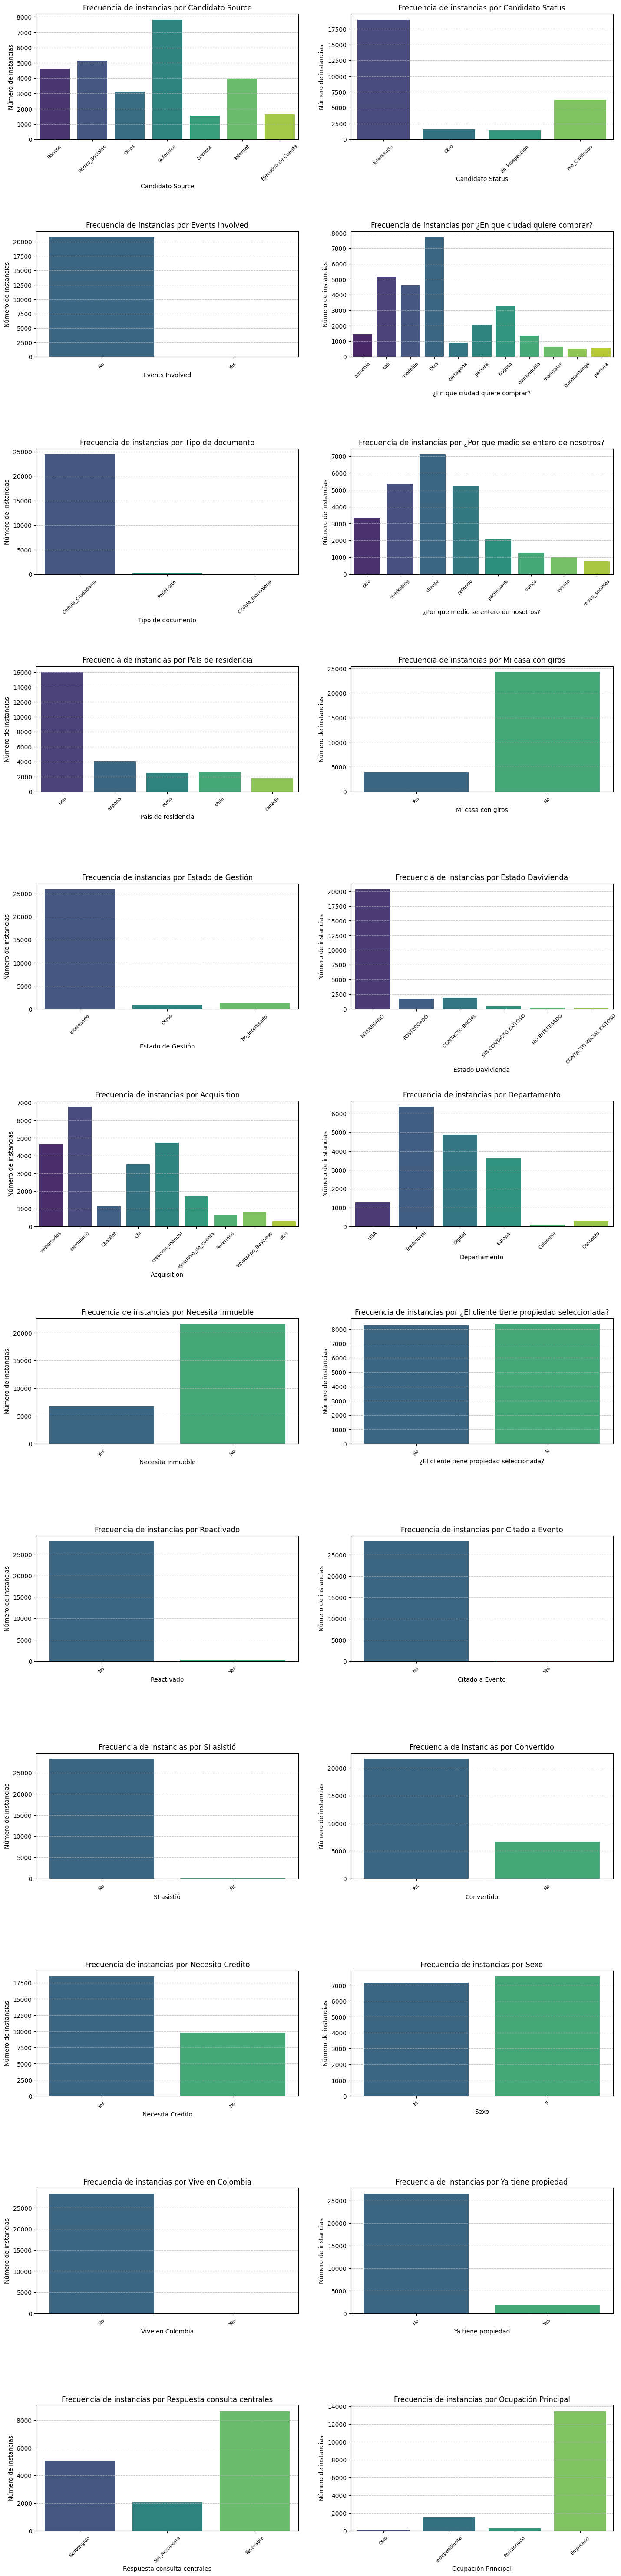

In [33]:
# Visualización del número de instancias por variables categoricas:
# Calcular el número de filas y columnas para los subplots
num_variables = len(Varscat)
num_filas = (num_variables + 1) // 2  # Redondeo hacia arriba
num_columnas = 2

# Ajustar el tamaño de la figura y el espaciado entre los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, num_filas * 5))  # Aumentar el tamaño de la figura

# Para cada variable categórica en la lista, generar un gráfico de barras
for i, variable in enumerate(Varscat):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.countplot(data=df, x=variable, palette='viridis', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Frecuencia de instancias por {variable}', fontsize=12)
    axs[fila, columna].set_xlabel(variable, fontsize=10)
    axs[fila, columna].set_ylabel('Número de instancias', fontsize=10)
    axs[fila, columna].tick_params(axis='x', rotation=45, labelsize=8)
    axs[fila, columna].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño y el espaciado entre subplots
plt.tight_layout(pad=3.0)  # Aumentar el espaciado entre subplots
plt.show()


Después de analizar las frecuencias de las variables categóricas y representarlas gráficamente, se observa que en algunas columnas la mayoría de los datos pertenecen a una sola categoría. Se procede a revisar estas variables con el fin de determinar su relevancia para la inclusión en el modelo:

In [34]:
#Revisar variable "Events involved":
df['Events Involved'].value_counts()

#Revisar variable "Tipo de documento":
df['Tipo de documento'].value_counts()

#Revisar variable "Reactivado":
df['Reactivado'].value_counts()

#Revisar variable "Citado a Evento":
df['Citado a Evento'].value_counts()

#Revisar variable "SI asistió":
df['SI asistió'].value_counts()

#Revisar variable "Vive en Colombia":
df['Vive en Colombia'].value_counts()

#Eliminar estas variables dado que estan altamente desbalanceada:
df = df.drop(['Events Involved','Tipo de documento','Reactivado','Citado a Evento','SI asistió','Vive en Colombia'], axis=1)

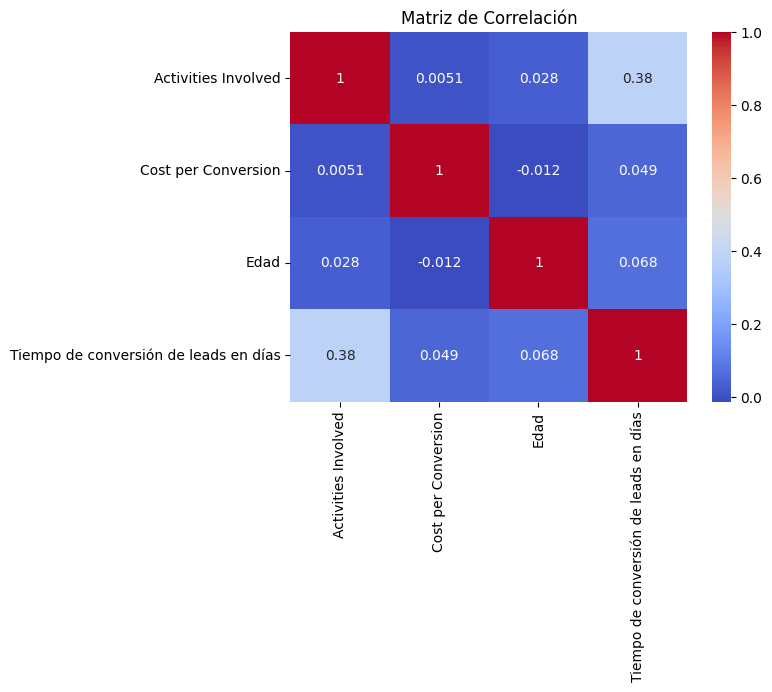

In [36]:
# Realizar matriz de correlación para variables numericas

sns.heatmap(df[['Activities Involved', 'Cost per Conversion', 'Edad', 'Tiempo de conversión de leads en días']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

 Las correlaciones entre las variable númericas son bastante bajas, a excepción de la correlación moderada entre "Activities Involved" y "Tiempo de conversión de leads en días".

##Imputación de Valores Faltantes

In [37]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Candidato Source                               457
Candidato Status                                 6
Activities Involved                              0
¿En que ciudad quiere comprar?                   0
¿Por que medio se entero de nosotros?         2191
País de residencia                            1371
Mi casa con giros                               95
Estado de Gestión                              301
Estado Davivienda                             3523
Acquisition                                   4107
Departamento                                 11776
Cost per Conversion                              0
Necesita Inmueble                               15
¿El cliente tiene propiedad seleccionada?    11679
Convertido                                       0
Edad                                             0
Necesita Credito                                 0
Sexo                                         13590
Ya tiene propiedad                               0
Tiem

In [38]:
# Imputar valores faltantes con la moda en la variable 'Candidato Source'
df['Candidato Source'].fillna(df['Candidato Source'].mode()[0], inplace=True)

# Imputar valores faltantes con la moda en la variable 'Candidato Status'
df['Candidato Status'].fillna(df['Candidato Status'].mode()[0], inplace=True)

# Imputar valores faltantes con la moda en la variable '¿Por que medio se entero de nosotros?'
df['¿Por que medio se entero de nosotros?'].fillna(df['¿Por que medio se entero de nosotros?'].mode()[0], inplace=True)

# Imputar valores faltantes en la variable 'País de residencia'
df['País de residencia'].fillna('Unknown', inplace=True)

# Imputar valores faltantes con la moda en la variable 'Mi casa con giros'
df['Mi casa con giros'].fillna(df['Mi casa con giros'].mode()[0], inplace=True)

# Imputar valores faltantes con la moda en la variable 'Estado de Gestión'
df['Estado de Gestión'].fillna(df['Estado de Gestión'].mode()[0], inplace=True)

# Imputar valores faltantes con la media de 'Tiempo de conversión de leads en días'
df['Tiempo de conversión de leads en días'].fillna(df['Tiempo de conversión de leads en días'].mean(), inplace=True)

# Imputar valores faltantes con la moda de 'Necesita Inmueble'
df['Necesita Inmueble'].fillna(df['Necesita Inmueble'].mode()[0], inplace=True)

# Imputar valores faltantes de 'Departamento'
df['Departamento'].fillna('Unknown', inplace=True)

# Imputar valores faltantes de '¿El cliente tiene propiedad seleccionada?'
df['¿El cliente tiene propiedad seleccionada?'].fillna('Unknown', inplace=True)

# Imputar valores faltantes de 'Respuesta consulta centrales'
df['Respuesta consulta centrales'].fillna('Unknown', inplace=True)

# Imputar valores faltantes de 'Ocupación Principal'
df['Ocupación Principal'].fillna('Unknown', inplace=True)

# Imputar valores faltantes de 'Sexo'
df['Sexo'].fillna('Unknown', inplace=True)

# Imputar valores faltantes con la moda de 'Estado Davivienda'
df['Estado Davivienda'].fillna(df['Estado Davivienda'].mode()[0], inplace=True)

# Imputar valores faltantes con la moda de 'Acquisition'
df['Acquisition'].fillna(df['Acquisition'].mode()[0], inplace=True)


In [39]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Candidato Source                             0
Candidato Status                             0
Activities Involved                          0
¿En que ciudad quiere comprar?               0
¿Por que medio se entero de nosotros?        0
País de residencia                           0
Mi casa con giros                            0
Estado de Gestión                            0
Estado Davivienda                            0
Acquisition                                  0
Departamento                                 0
Cost per Conversion                          0
Necesita Inmueble                            0
¿El cliente tiene propiedad seleccionada?    0
Convertido                                   0
Edad                                         0
Necesita Credito                             0
Sexo                                         0
Ya tiene propiedad                           0
Tiempo de conversión de leads en días        0
Respuesta consulta centrales     

In [40]:
#Verificación de registros duplicados
df.loc[df.duplicated()]

#Eliminación de datos duplicados
df = df.drop_duplicates()

#Verificación de registros duplicados
df.loc[df.duplicated()]

,Candidato Source,Candidato Status,Activities Involved,¿En que ciudad quiere comprar?,¿Por que medio se entero de nosotros?,País de residencia,Mi casa con giros,Estado de Gestión,Estado Davivienda,Acquisition,...,Necesita Inmueble,¿El cliente tiene propiedad seleccionada?,Convertido,Edad,Necesita Credito,Sexo,Ya tiene propiedad,Tiempo de conversión de leads en días,Respuesta consulta centrales,Ocupación Principal


In [41]:
#Procedemos a renombrar las variables de entrada para hacer referencia a ellas de manera más clara:
variables = {'Candidato Source':'Origen_Cliente',
             'Candidato Status': 'Estado_Cliente',
             'Activities Involved': 'Actividad_Involucrada',
             '¿En que ciudad quiere comprar?': 'Ciudad_Compra',
             '¿Por que medio se entero de nosotros?': 'Medio_Contacto',
             'País de residencia': 'Pais_Residencia',
             'Mi casa con giros': 'Estrategia_Mi_Casa_Giros',
             'Estado de Gestión': 'Estado_Gestion',
             'Estado Davivienda': 'Estrategia_Estado_Davivienda',
             'Acquisition': 'Adquisicion',
             'Departamento': 'Departamento',
             'Cost per Conversion': 'Costo_Conversion',
             'Necesita Inmueble': 'Necesita_Inmueble',
             '¿El cliente tiene propiedad seleccionada?': 'Propiedad_Seleccionada',
             'Convertido': 'Cliente_Convertido',
             'Edad': 'Edad',
             'Necesita Credito': 'Necesita_Credito',
             'Sexo': 'Sexo',
             'Ya tiene propiedad': 'Tiene_Propiedad',
             'Tiempo de conversión de leads en días': 'Tiempo_Conversion_Leads',
             'Respuesta consulta centrales': 'Consulta_Centrales',
             'Ocupación Principal': 'Ocupacion'}
df.rename(columns=variables, inplace=True)

##Preparación de Datos

In [42]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Preparación de datos
from sklearn.preprocessing import normalize
df[num_vars] = normalize(df[num_vars])
df[num_vars].head(2)

,Actividad_Involucrada,Costo_Conversion,Edad,Tiempo_Conversion_Leads
0,0.0000,0.0000,0.2625,0.9649
1,0.0000,0.0000,0.6044,0.7967


In [43]:
# Aplicación de la función de usuario Dummies: one-hot encoding:
df = pd.get_dummies(df, drop_first=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27609 entries, 0 to 28301
Data columns (total 72 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Actividad_Involucrada                                  27609 non-null  float64
 1   Costo_Conversion                                       27609 non-null  float64
 2   Edad                                                   27609 non-null  float64
 3   Tiempo_Conversion_Leads                                27609 non-null  float64
 4   Origen_Cliente_Ejecutivo de Cuenta                     27609 non-null  bool   
 5   Origen_Cliente_Eventos                                 27609 non-null  bool   
 6   Origen_Cliente_Internet                                27609 non-null  bool   
 7   Origen_Cliente_Otros                                   27609 non-null  bool   
 8   Origen_Cliente_Redes_Sociales                      

In [46]:
#Guardar dataset para el modelo en un archivo CSV
dataset_csv = 'datos_salida.csv'
df.to_csv(dataset_csv, index=False)

# Descargar el archivo
files.download(dataset_csv)

#Visualizar dataset para el modelo
df.head(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Actividad_Involucrada,Costo_Conversion,Edad,Tiempo_Conversion_Leads,Origen_Cliente_Ejecutivo de Cuenta,Origen_Cliente_Eventos,Origen_Cliente_Internet,Origen_Cliente_Otros,Origen_Cliente_Redes_Sociales,Origen_Cliente_Referidos,...,Sexo_M,Sexo_Unknown,Tiene_Propiedad_Yes,Consulta_Centrales_Restringido,Consulta_Centrales_Sin_Respuesta,Consulta_Centrales_Unknown,Ocupacion_Independiente,Ocupacion_Otro,Ocupacion_Pensionado,Ocupacion_Unknown
0,0.0000,0.0000,0.2625,0.9649,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,0.0000,0.0000,0.6044,0.7967,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False


In [47]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

##Definir posible número de clusters

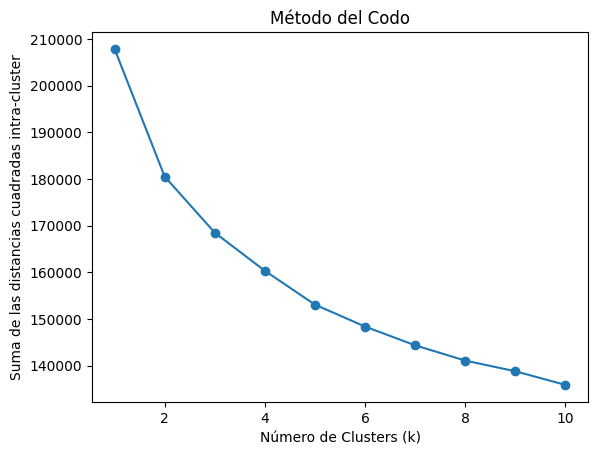

In [48]:
# Lista para almacenar las sumas de las distancias cuadradas intra-cluster
distancias_intra_cluster = []

# Probar diferentes valores de k
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    distancias_intra_cluster.append(kmeans.inertia_)  # Inertia: suma de las distancias cuadradas intra-cluster

# Graficar la curva del codo
plt.plot(k_values, distancias_intra_cluster, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de las distancias cuadradas intra-cluster')
plt.title('Método del Codo')
plt.show()

Se observa una gran disminución en la suma de las distancias cuadradas cuando se incrementa el número de clusters de 1 a 2, y luego a 3. En este caso, el número óptimo de clusters para nuestros datos podría ser 3, según la interpretación del gráfico del método del codo, después de este punto, agregar más clusters no proporciona una mejora significativa


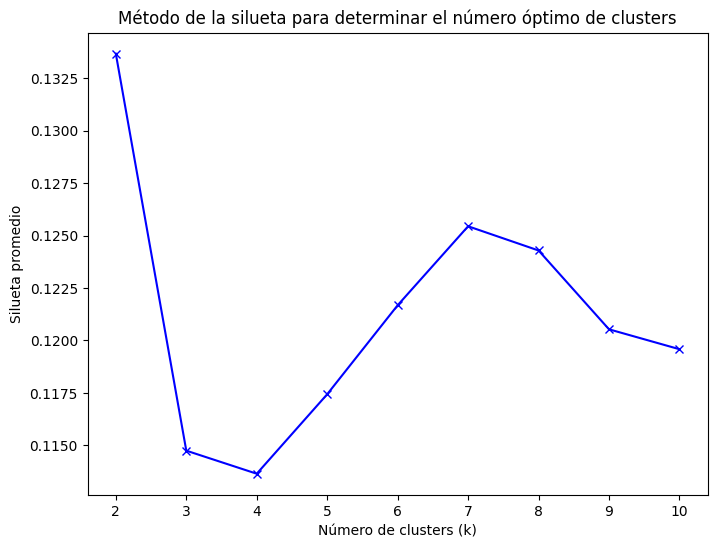

In [49]:
# Rango de valores de k a probar
k_range = range(2, 11)

# Calcular la silueta promedio para cada valor de k
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta promedio')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.show()

Basado en el coeficiente de silueta, el numero optimo de clusters podría ser K = 2, ya que este valor maximiza el coeficiente de silueta promedio.

